In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import random

from tqdm import tqdm

# Домашнее задание 4 - Непараметрические критерии


##Задача 1

1.   Сгенерить самостоятельно 2 распределения, нормальное с любыми параметрами и размером 1000 и Бернулли с параметрами 1, 0.5 и размером 100 +
2.   Для каждого распределения
    *   Построить Q-Q plot
    *   Проверить нормальность с помощью критерия согласия Колмогорова
    *   Проверить нормальность с помощью критерия Шапиро-Уилка
    *   Проверить то что ваши распределения имееют общее распределение с помощью критерия однородности Смирнова
3.   Собрать новую выборку из ваших 2 сгенирированных распределений. Для этого взять случайных 900 элементов из нормального распределения и добавить к ним выборку с биномиальным распределением, чтобы снова получили выборки из 1000 элементов
4.   Для новой "собранной выборки"
    *   Построить Q-Q plot
    *   Проверить нормальность с помощью критерия согласия Колмогорова
    *   Проверить нормальность с помощью критерия Шапиро-Уилка
5.  Из выборки с нормальным распределением получить новую выборку. Сделаем это с помощью "докидывания эффекта". Взять текущую выборку с нормальным распределением и рандомные 500 элементов увеличить на 5%, остальные оставим без изменений
6. Для новой выборки с "докинутым эффектом"
    *   Построить Q-Q plot
    *   Проверить нормальность с помощью критерия согласия Колмогорова
    *   Проверить нормальность с помощью критерия Шапиро-Уилка
    *   Проверить то что ваши распределения(изначальное нормальное из п1 и полученное в п5) имееют общее распределение с помощью критерия однородности Смирнова


In [81]:
norm_sample, bern_sample = np.random.normal(loc=0, scale=1, size=1000), np.random.binomial(n=1, p=0.5, size=100)
bern_sample

array([0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1])

### Q-Q for initial samples

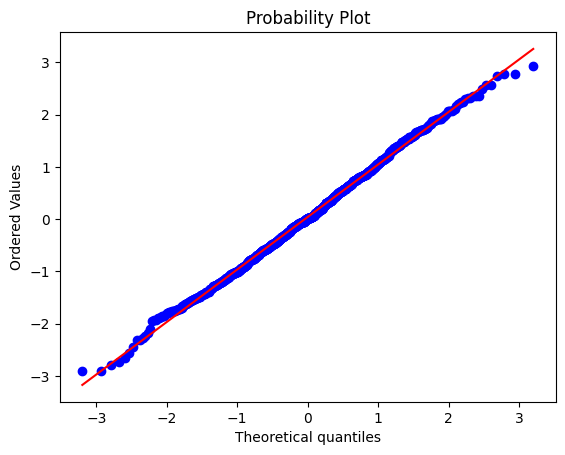

In [82]:
stats.probplot(norm_sample, dist="norm", plot=plt);

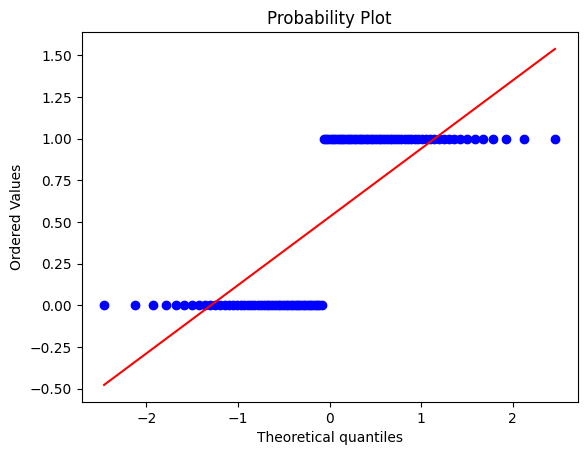

In [83]:
stats.probplot(bern_sample, dist="norm", plot=plt);

### Colmogorov's criteria for initial samples

In [84]:
stats.kstest(norm_sample, 'norm', args=(norm_sample.mean(), norm_sample.std(ddof=1)))

KstestResult(statistic=np.float64(0.02410278708844349), pvalue=np.float64(0.5979726902406687), statistic_location=np.float64(0.04584428422101101), statistic_sign=np.int8(1))

In [85]:
stats.kstest(bern_sample, 'norm', args=(bern_sample.mean(), bern_sample.std(ddof=1)))

KstestResult(statistic=np.float64(0.3556146174418504), pvalue=np.float64(8.026068916538227e-12), statistic_location=np.int64(1), statistic_sign=np.int8(-1))

### Shapiro test

In [86]:
stats.shapiro(norm_sample)

ShapiroResult(statistic=np.float64(0.9978531080463238), pvalue=np.float64(0.22646116725058119))

In [87]:
stats.shapiro(bern_sample)

ShapiroResult(statistic=np.float64(0.6350909207487989), pvalue=np.float64(2.1008264955128554e-14))

### Colmogorov's criteria for both samples

In [88]:
stats.ks_2samp(norm_sample, bern_sample)

KstestResult(statistic=np.float64(0.491), pvalue=np.float64(1.3488723304110798e-20), statistic_location=np.float64(-0.005993085573858875), statistic_sign=np.int8(1))

### New sample of 500 rows

In [91]:
new_norm = norm_sample.copy()
new_norm[:499] = new_norm[:499] * 1.05

len(new_norm)

1000

In [92]:
stats.ks_2samp(norm_sample, new_norm)

KstestResult(statistic=np.float64(0.011), pvalue=np.float64(0.9999999867571524), statistic_location=np.float64(0.7681356275328148), statistic_sign=np.int8(1))

## Задача 2

Для данных из файла employees.xls постройте гистограмму для переменной SALARY. Проверьте нормальность этих данных с помощью:
  * Q-Q plot
  * Критерия Колмогорова
  * Критерия Шапиро-Уилка

In [35]:
!curl -O https://raw.githubusercontent.com/YuriyKotov/datasets/master/employees.xls >> employees.xls

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 26624  100 26624    0     0  92639      0 --:--:-- --:--:-- --:--:-- 92766


In [36]:
import pandas as pd

df = pd.read_excel('employees.xls').rename(columns={'Unnamed: 0': 'NAME'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   NAME      100 non-null    object
 1   GENDER    100 non-null    object
 2   DEPART    100 non-null    object
 3   EDUC      100 non-null    object
 4   AGE       100 non-null    int64 
 5   HEIGHT    100 non-null    int64 
 6   SENIOR    100 non-null    int64 
 7   SALARY    100 non-null    int64 
 8   INI_PROF  100 non-null    int64 
 9   CUR_PROF  100 non-null    int64 
dtypes: int64(6), object(4)
memory usage: 7.9+ KB


In [37]:
df.head()

,NAME,GENDER,DEPART,EDUC,AGE,HEIGHT,SENIOR,SALARY,INI_PROF,CUR_PROF
0,Alexander,Female,Ship,College,22,63,4,23400,82,90
1,Arcones,Male,Package,College,49,65,17,40400,89,123
2,Barber,Male,Bake,College,36,67,8,29400,77,93
3,Barrera,Male,Package,HS,37,67,3,24800,102,108
4,Bester,Male,Ship,Grad,43,66,11,31200,82,104


<Axes: >

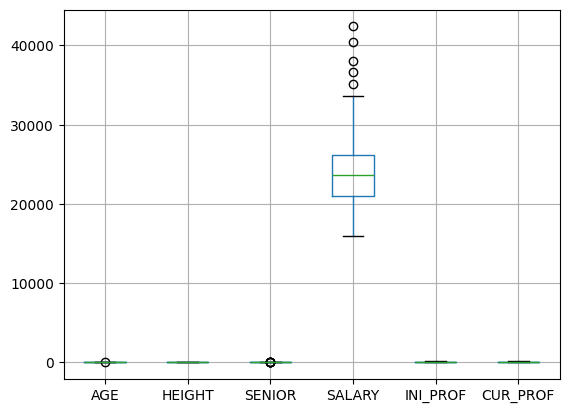

In [48]:
df.boxplot()

<Axes: ylabel='Density'>

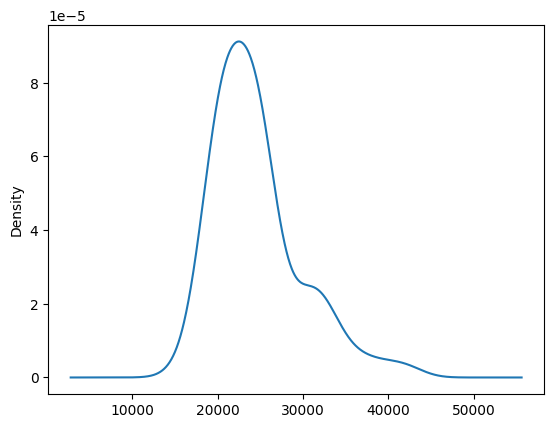

In [40]:
df['SALARY'].plot.kde()

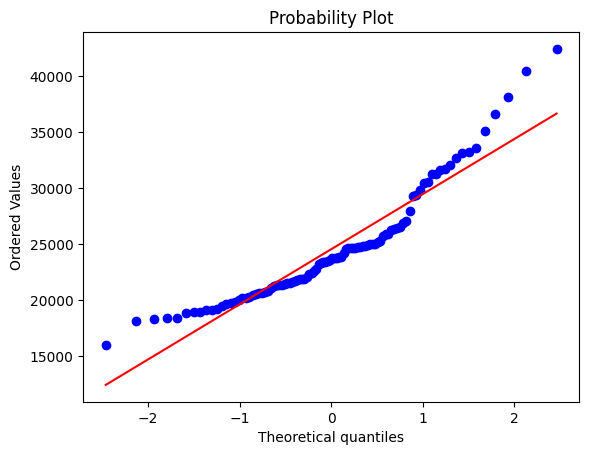

In [38]:
stats.probplot(df['SALARY'], dist="norm", plot=plt);

In [43]:
x = df['SALARY']
_, pval = stats.kstest(x, 'norm', args=(x.mean(), x.std(ddof=1)))
pval

np.float64(0.01678820637964868)

In [46]:
_, pval = stats.shapiro(x)
pval

np.float64(1.664645028598051e-06)

## Задача 3

Для данных из файла employees.xls проверить с помощью критерия знаков и рангового критерия гипотезу что медианная зарплата равна 25000

In [49]:
from statsmodels.stats.descriptivestats import sign_test

hypothesized_median = 25000
salary_data = df['SALARY']

_, pval = sign_test(salary_data, mu0=hypothesized_median)
pval

np.float64(0.000490157948963301)

## Задача 4

В файле anorexia.txt записан вес пациентов до и после начала терапии от анорексии. С помощью критерия знаков и рангового критерия проверить, была ли эффективна данная терапия

In [52]:
!curl -O https://raw.githubusercontent.com/YuriyKotov/datasets/master/anorexia.txt >> anorexia.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   355  100   355    0     0   1206      0 --:--:-- --:--:-- --:--:--  1203


In [53]:
df = pd.read_csv('anorexia.txt', sep='\t')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Before  29 non-null     float64
 1   After   29 non-null     float64
dtypes: float64(2)
memory usage: 596.0 bytes


In [54]:
df.head()

,Before,After
0,80.5,82.2
1,84.9,85.6
2,81.5,81.4
3,82.6,81.9
4,79.9,76.4


In [55]:
before, after = df['Before'], df['After']
before

,Before
0,80.5
1,84.9
2,81.5
3,82.6
4,79.9
5,88.7
6,94.9
7,76.3
8,81.0
9,80.5


In [61]:
_, pval = sign_test(after - before)
pval

np.float64(0.26493089646101)

In [62]:
_, pvalue = stats.wilcoxon(after - before)
pvalue

np.float64(0.06291972262602667)

## Задача 5

В файле seattle.txt записаны цены на объекты недвижимости в одном районе из районов Сиетла в 2001 и 2002 году (объекты выбирались случайно). Изменились ли средние цены в этом районе за год? Проверить это с помощью рангового критерия

In [63]:
!curl -O https://raw.githubusercontent.com/YuriyKotov/datasets/master/seattle.txt >> seattle.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   996  100   996    0     0   3088      0 --:--:-- --:--:-- --:--:--  3093


In [64]:
df = pd.read_csv('seattle.txt', sep='\t')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   100 non-null    float64
 1   Year    100 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 1.7 KB


In [65]:
df.head()

,Price,Year
0,142.0,2002
1,232.0,2002
2,132.5,2002
3,200.0,2002
4,362.0,2002


In [66]:
df['Year'].unique()

array([2002, 2001])

In [67]:
first, second = df[df['Year'] == 2001]['Price'], df[df['Year'] == 2002]['Price']
first

,Price
50,419.000
51,55.268
52,65.000
53,210.000
54,510.728
55,212.200
56,152.720
57,266.600
58,69.427
59,125.000


In [70]:
_, p = stats.mannwhitneyu(second, first, alternative="two-sided")
p

np.float64(0.7563872675701748)

## Задача 6

В рамках исследования эффективности лекарства
пациенты с синдромом дефицита внимания и гиперактивностью в течение недели принимали либо лекарство, либо плацебо. В конце недели каждый пациент проходил тест на способность к подавлению импульсивных поведенческих реакций. Был ли эффект от применения лекарства? Данные находятся в файле methylphenidate.txt.

In [23]:
!curl -O https://raw.githubusercontent.com/YuriyKotov/datasets/master/methylphenidate.txt >> methylphenidate.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   168  100   168    0     0    671      0 --:--:-- --:--:-- --:--:--   674


In [24]:
df = pd.read_csv('methylphenidate.txt', sep=' ')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Placebo          24 non-null     int64
 1   Methylphenidate  24 non-null     int64
dtypes: int64(2)
memory usage: 516.0 bytes


In [25]:
df.head()

,Placebo,Methylphenidate
0,57,62
1,27,49
2,32,30
3,31,34
4,34,38


In [30]:
df.describe()

,Placebo,Methylphenidate
count,24.000000,24.000000
mean,39.750000,44.708333
std,11.314669,12.319935
min,26.000000,29.000000
25%,33.000000,35.000000
50%,36.000000,42.500000
75%,44.500000,52.500000
max,71.000000,77.000000


In [34]:
_, pval = stats.mannwhitneyu(df['Methylphenidate'], df['Placebo'])
pval

np.float64(0.09219468960273668)

## Задача 7


1.   Сгенерировать выборки с нормальным распределением без выбросов, докинуть эффект на одну из них равномерно и с помощью распределения
2.   То же, что и в п1, но выборки с выбросами сделать
3.   Для случаев из п1 и п2 бутстрэпом оценить: среднее, медиану, 25% перцентиль, построить доверительные интервалы для статистик (речь о разницах средних/медиан/перцентилей для групп)

Примечание:
- Бутстреп считать минимум на 1000 итераций
- Для докидывания эффекта с помощью распределения возьмите распределение из stats, параметры задаются исходя из параметров изначального вектора и желаемого эффекта

In [96]:
def get_bootstrap_sample(x, B_sample=1):
    N = x.size
    sample = np.random.choice(x, size=(N, B_sample), replace=True)

    if B_sample == 1:
        sample = sample.T[0]
    return sample

In [93]:
# 1

n_samples = 1000
mean = 0
std_dev = 1

sample1 = np.random.normal(loc=mean, scale=std_dev, size=n_samples)

sample2 = np.random.normal(loc=mean, scale=std_dev, size=n_samples) * 1.05 # докинули эффект равномерно

effect_normal = np.random.normal(loc=2, scale=0.5, size=n_samples)
sample3 = np.random.normal(loc=mean, scale=std_dev, size=n_samples) + effect_normal # докинули эффект с помощью распределения

In [95]:
# 2

# Докидываем выбросы из сгенерированных данных из равномерного распределения
# Особо не играет роли как докидывать выборосы, можно хоть вручную добавить
sample4 = np.copy(sample1)
sample4[np.random.choice(n_samples, size=50, replace=False)] = np.random.uniform(low=10, high=15, size=50)

sample5 = np.copy(sample2)
sample5[np.random.choice(n_samples, size=50, replace=False)] = np.random.uniform(low=10, high=15, size=50)

sample6 = np.copy(sample3)
sample6[np.random.choice(n_samples, size=50, replace=False)] = np.random.uniform(low=10, high=15, size=50)

In [98]:
sample5_boot = get_bootstrap_sample(sample5, B_sample=1000)
sample5_boot.shape

(1000, 1000)

In [99]:
sample5_boot_m = np.median(sample5_boot, axis=0)
sample5_boot_m.size

1000

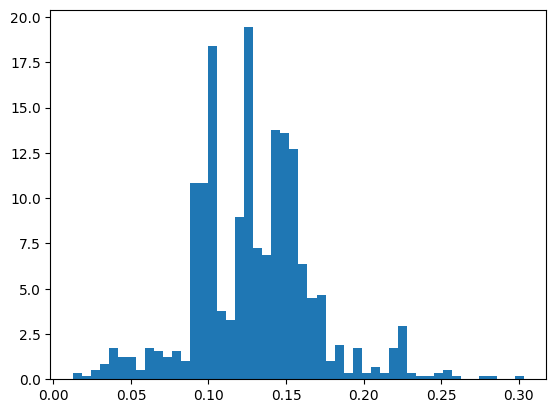

In [100]:
plt.hist(sample5_boot_m, bins=50, density=True);

In [101]:
alpha = 0.05

left = np.quantile(sample5_boot_m, alpha/2)
right = np.quantile(sample5_boot_m, 1-alpha/2)
left, right

(np.float64(0.046606978599009814), np.float64(0.22390730101346673))

In [107]:
theta_hat = np.median(sample5)
print(theta_hat)
sample5_boot_h = np.mean(sample5_boot_m - theta_hat, axis=0)

left = theta_hat - np.quantile(sample5_boot_h, 1-alpha/2)
right = theta_hat - np.quantile(sample5_boot_h, alpha/2)
left, right

0.12894909175419117


(np.float64(0.12830304564123354), np.float64(0.12830304564123354))